# **Data Visualizer**
---

### Imports

In [1]:
# PYTHONPATH set up.
import os
import sys

sys.path.append(os.path.join(os.path.abspath(path="."), "..", ".."))

In [2]:
import re
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from data.schemas import Annotation

# **Data Loader**

In [3]:
ANNOTATION_DIR = "/mnt/c/Users/Janemeire/Downloads/samples/"

In [4]:
# Get all annotation files in the directory.
annot_name_regex = re.compile(pattern=r"^[\da-f]{8}-[\da-f]{4}-[\da-f]{4}-[\da-f]{4}-[\da-f]{12}$")
annotation_files = Path(ANNOTATION_DIR).rglob(pattern="*.json")
annotation_files = [f for f in annotation_files if annot_name_regex.match(f.stem)]
print("Found %d annotation files." % len(annotation_files))

Found 23474 annotation files.


### Visualization

In [5]:
def load_annotation(annotation_path):
    """
    Load an annotation file.

    Args:
        annotation_path (str): Path to the annotation file.

    Returns:
        Annotation: The loaded annotation.
    """
    # Load the annotation.
    with open(file=annotation_path, mode="r") as file_buffer:
        annotation = json.load(fp=file_buffer)
    
    # Try to parse the annotation.
    try:
        annotation = Annotation(**annotation)
    except Exception:
        print("Failed to parse annotation file: %s" % annotation_path)
        print("Error: %s" % str(sys.exc_info()[1]))
        return None

    return annotation


def load_image(image_path):
    """
    Load an image file.

    Args:
        image_path (str): Path to the image file.

    Returns:
        numpy.ndarray: The loaded image.
    """
    # Load the image.
    with Image.open(fp=image_path) as pil_img:
        pil_img = pil_img.convert(mode="RGB")
    return np.asarray(a=pil_img)


def plot_annotation(annotation_path):
    """
    Tries to load an annotation file and plot the image with 
    bounding boxes.

    Args:
        annotation_path (str): Path to the annotation file.
    """
    # Load the annotation.
    annotation = load_annotation(annotation_path=annotation_path)
    if annotation is None:
        return

    # Plot the image.
    image = load_image(image_path=annotation.image_filepath)
    plt.imshow(X=image)

    # Plot prompt text.
    plt.title(label=annotation.text)

    # Plot the bounding boxes.
    for box in annotation.annotations:
        x1 = box.cx - box.width / 2
        y1 = box.cy - box.height / 2
        x2 = box.cx + box.width / 2
        y2 = box.cy + box.height / 2
        plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], color="lime", linewidth=2)

    plt.show()

In [6]:
# Set an index annotation to be loaded or None to load a random one.
INDEX = None

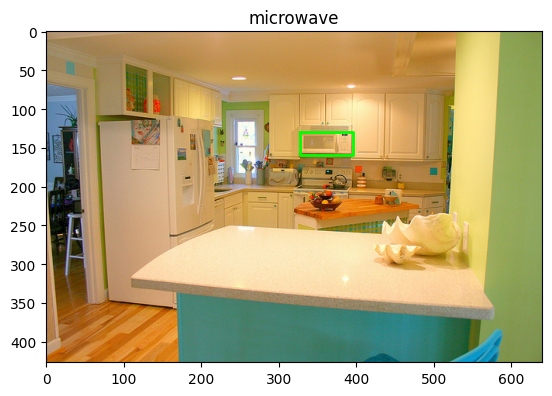

In [38]:
if INDEX is None:
    annot_index = np.random.randint(low=0, high=len(annotation_files), size=1).item()
else:
    annot_index = INDEX

plot_annotation(annotation_path=annotation_files[annot_index])